In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def cost(x,y):
    ax_index_x = 1 if len(x.shape) >1 else 0
    ax_index_y = 1 if len(y.shape) >1 else 0
    ax_index = np.max([ax_index_x, ax_index_y])
    return np.sqrt(np.sum((x-y)**2, axis=ax_index))

In [3]:
def cost_matrix(x, y, cost_fn = cost):
    return np.array([cost_fn(x,y_i) for y_i in y]).T

In [4]:
def cluster_allocations(cost_mat):
    return np.argmin(cost_mat, axis=1)
    

In [5]:
def cluster_allocation(x,y):
    costs = cost(x,y)
    alloc = np.argmin(costs)
    return alloc

In [40]:
num_atoms = 9
x_dim = 2
N = 500
batch_size = 20
num_iterations = 10**4
y = np.array([np.random.rand(x_dim) for _ in range(num_atoms)])
x = np.array([np.random.rand(x_dim) for _ in range(N)])
g = np.array([np.random.rand() for _ in range(num_atoms)])
b = np.ones(num_atoms) / num_atoms

In [41]:
average_y = y.copy()
counts = [0 for _ in range(num_atoms)]

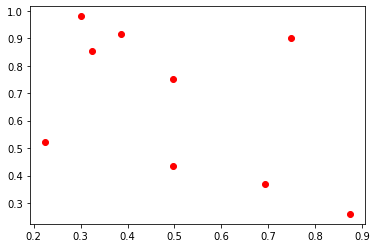

In [42]:
plt.plot(average_y[:,0],average_y[:,1], "ro")

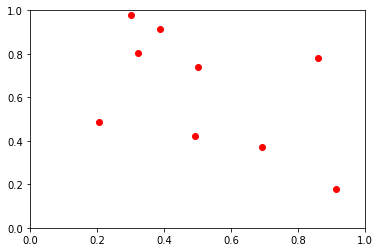

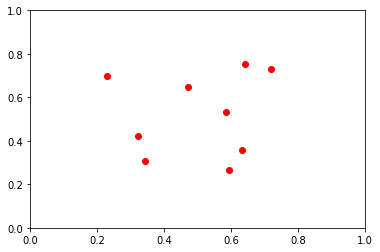

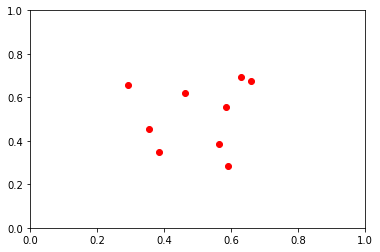

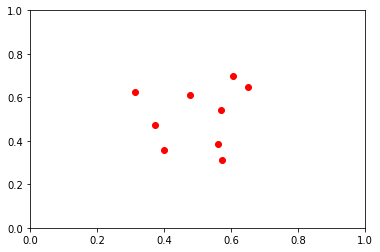

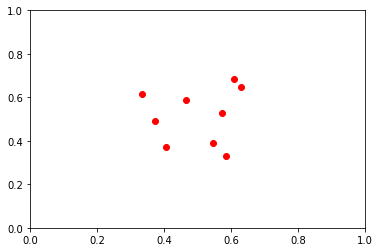

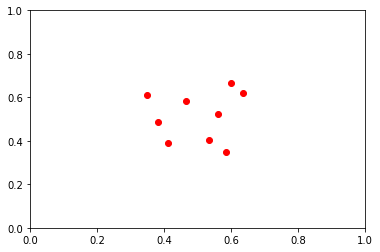

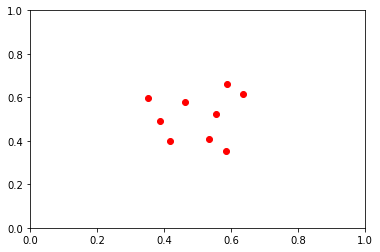

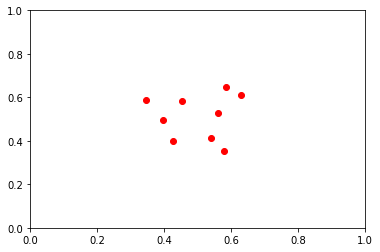

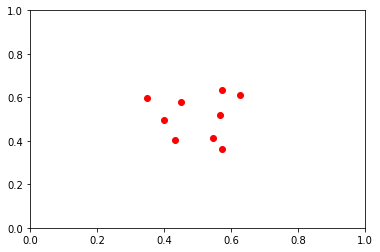

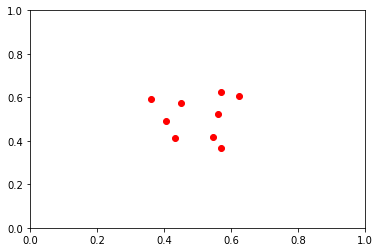

In [43]:
for i in range(num_iterations):
    x_samples = np.array([np.random.random(size=x_dim) for _ in range(batch_size)])
    alloc = np.array([cluster_allocation(x_samples[idx,:],y) for idx in range(len(x_samples))])
    
    grouped_df = pd.DataFrame({'x0':x_samples[:,0], 'x1':x_samples[:,1], 'alloc':alloc})\
    .groupby('alloc')
    means_df = grouped_df.agg({'mean'})
    count_df = grouped_df.agg({'count'})
    for j in range(num_atoms):
        if j in means_df.index:
            y[j] = means_df.loc[j,['x0','x1']].values
            counts[j] += count_df.loc[j,['x0']].values
    
            average_y[j] = (average_y[j]*counts[j] + y[j])
            counts[j] += 1
            average_y[j] = average_y[j]/counts[j]
    
    if i % 10**3 == 0:
        plt.plot(average_y[:,0],average_y[:,1], "ro")
        plt.xlim(0.,1.)
        plt.ylim(0.,1.)
        plt.show()

(0.0, 1.0)

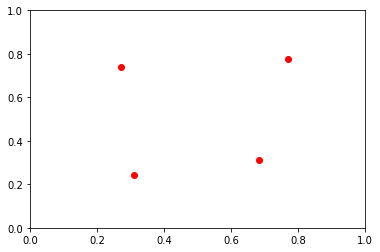

In [13]:
x_samples

array([[0.04994332, 0.5944191 ],
       [0.2135311 , 0.93265688],
       [0.33857518, 0.02192028],
       [0.5961662 , 0.62828259],
       [0.56449736, 0.61870391],
       [0.02064421, 0.9630284 ],
       [0.5800399 , 0.20152351],
       [0.19452523, 0.36677197],
       [0.818089  , 0.71755511],
       [0.74670825, 0.95708432],
       [0.43774523, 0.15419648],
       [0.33990074, 0.58796289],
       [0.79222757, 0.66650802],
       [0.68720516, 0.6017579 ],
       [0.25827175, 0.34904216],
       [0.81419684, 0.29523735],
       [0.39426284, 0.63491498],
       [0.62552416, 0.97460855],
       [0.16748208, 0.84066101],
       [0.66995255, 0.40585743]])